In [28]:
import pandas as pd
from pandas.api.types import is_datetime64_any_dtype as is_datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
sns.set_style("darkgrid")
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["figure.dpi"] = 80

In [30]:
# Column to use as the date
date_col = "Date"

In [31]:
# Replace with the file you want to use and load your dataset into a DataFrame
df = pd.read_csv(r"NVDA.csv", index_col=date_col, parse_dates=True)

In [32]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-22,19.650000,19.650000,19.170000,19.410000,18.851749,8911800
2015-07-23,19.450001,19.940001,19.410000,19.650000,19.084845,4247900
2015-07-24,19.790001,19.809999,19.340000,19.420000,18.861464,4721100
2015-07-27,19.250000,19.530001,19.090000,19.309999,18.754622,4810500
2015-07-28,19.360001,19.860001,19.160000,19.730000,19.162542,4957700
...,...,...,...,...,...,...
2020-07-15,416.570007,417.320007,402.230011,409.089996,409.089996,10099600
2020-07-16,400.600006,408.269989,395.820007,405.390015,405.390015,8624100
2020-07-17,409.019989,409.940002,403.510010,408.059998,408.059998,6657100


In [33]:
# Check that the index is correctly converted to a date
print("The index been parsed as a date: " + str(is_datetime(df.index)))

The index been parsed as a date: True


In [34]:
# Replace this with the name of the column you want to analyze
var_col = "Close"

In [35]:
# Reduce the DataFrame down to the relevant columns
df_subset = df[[var_col]]

In [36]:
# Select the date range you want to explore
df_time = df_subset["2020-1-1":"2021-1-1" ].copy() # Pass in the date ranges you are interested in here

In [37]:
# Preview the DataFrame
df_time

,Close
Date,
2020-01-02,239.910004
2020-01-03,236.070007
2020-01-06,237.059998
2020-01-07,239.929993
2020-01-08,240.380005
...,...
2020-07-15,409.089996
2020-07-16,405.390015
2020-07-17,408.059998


## Downsampling data

In [38]:
# Set your downsampling periods here
downsample_one = "W"
downsample_two = "M"

In [39]:
# Create a new DataFrame by downsampling with the first downsample period
df_downsample_one = df_time.resample(downsample_one).mean().copy()

In [40]:
# Create a new DataFrame by downsampling with the second downsample period
df_downsample_two = df_time.resample(downsample_two).mean().copy()

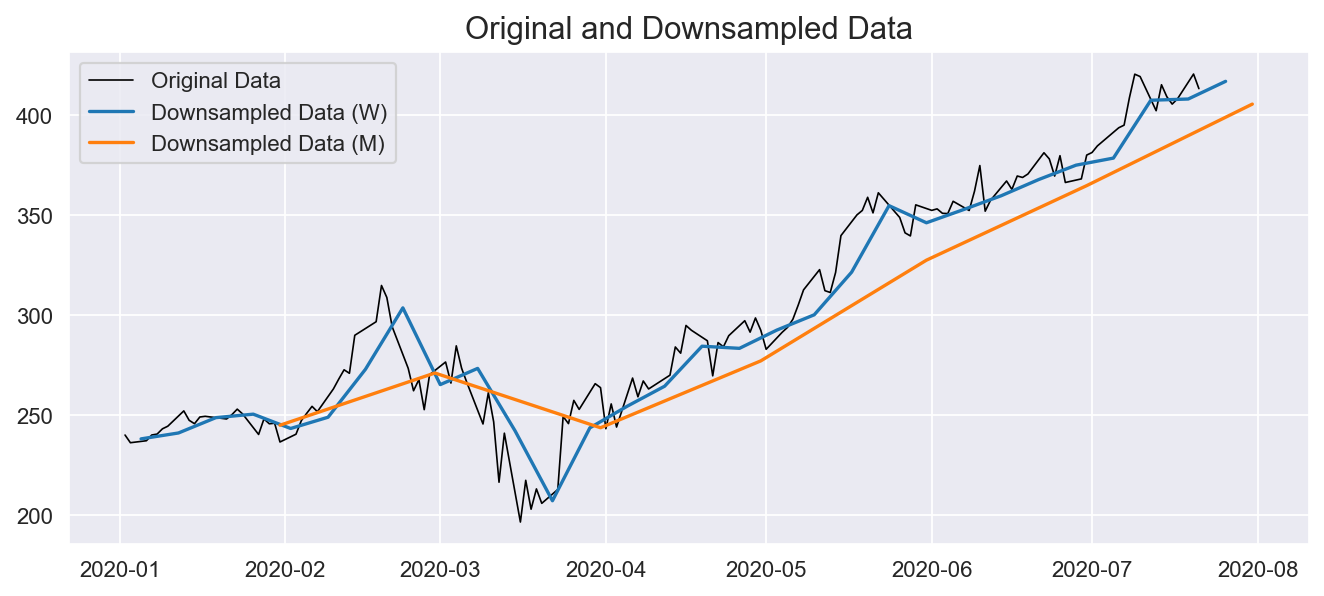

In [41]:
# Plot all three DataFrames
plt.plot(
    df_time.index,
    df_time[var_col],
    label="Original Data",
    color="black",
    linewidth=0.75, )
plt.plot(
    df_downsample_one.index,
    df_downsample_one[var_col],
    label="Downsampled Data " + f"({downsample_one})", )
plt.plot(
    df_downsample_two.index,
    df_downsample_two[var_col],
    label="Downsampled Data " + f"({downsample_two})", )
# Initialize a legend
plt.legend()
# Set the plot title
plt.title("Original and Downsampled Data", fontsize=14)
# Show the plot
plt.show()

## Upsampling data

In [42]:
# Set your upsampling period here
upsample = "H"

In [43]:
# Create an example DataFrame for upsampling demonstration
df_time_subset = df_time["2020-01-01":"2020-01-31"]

In [44]:
# Create a new DataFrame by upsampling the example DataFrame
df_upsample = df_time_subset.resample(upsample).asfreq()

In [45]:
# Preview the upsampled DataFrame
df_upsample

,Close
Date,
2020-01-02 00:00:00,239.910004
2020-01-02 01:00:00,NaN
2020-01-02 02:00:00,NaN
2020-01-02 03:00:00,NaN
2020-01-02 04:00:00,NaN
...,...
2020-01-30 20:00:00,NaN
2020-01-30 21:00:00,NaN
2020-01-30 22:00:00,NaN


In [46]:
# Upsample and fill missing values with a given value
df_upsample["nearest_value"] = df_time_subset.resample(upsample).fillna("nearest")

In [47]:
# Upsample and fill missing values with a forward fill
df_upsample["forward_fill"] = df_time_subset.resample(upsample).ffill()

In [48]:
# Upsample and fill missing values with interpolation
df_upsample["interpolate"] = df_time_subset.resample(upsample).interpolate()

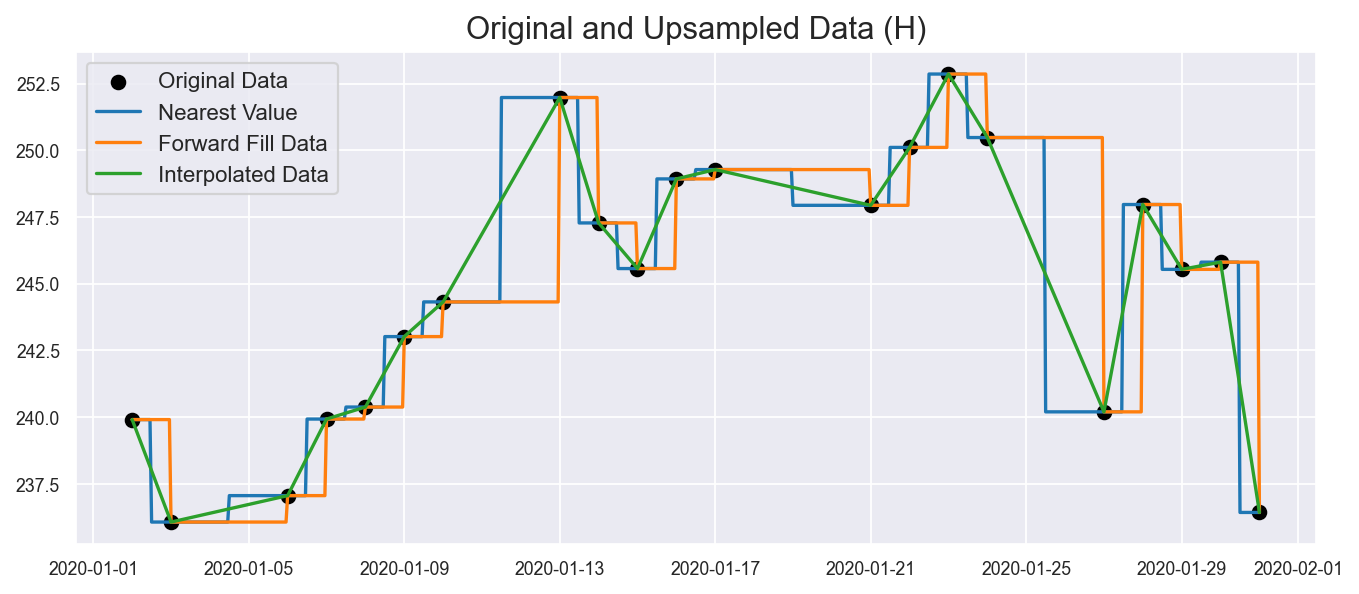

In [49]:
# Plot the original data and three of the upsampling methods
plt.scatter(df_upsample.index, df_upsample[var_col], label="Original Data", color="black" )
plt.plot(df_upsample.index, df_upsample["nearest_value"], label="Nearest Value")
plt.plot(df_upsample.index, df_upsample["forward_fill"], label="Forward Fill Data")
plt.plot(df_upsample.index, df_upsample["interpolate"], label="Interpolated Data")

# Initialize a legend
plt.legend()

# Set the plot title and format labels
plt.title("Original and Upsampled Data " + f"({upsample})", fontsize=14)
plt.xticks(size=8)
plt.yticks(size=8)
# Show the plot
plt.show()